In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

In [8]:
df=pd.read_csv('Loan_Modelling.csv',index_col='ID')
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
target_col='Personal_Loan'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [11]:
for col in df.columns:
    print(col,df[col].nunique())
    print(df[col].value_counts())
    print('-'*20)

Age 45
Age
35    151
43    149
52    145
54    143
58    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
45    127
60    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
67     12
23     12
Name: count, dtype: int64
--------------------
Experience 47
Experience
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1   

In [16]:
cont_cols=['Age','Experience','Income','CCAvg','Mortgage']
cat_cols=['Family','Education','Securities_Account','CD_Account','Online','CreditCard']
drop_cols=['ZIPCode']
target_cols='Personal_Loan'

### Univariate Analysis

Age


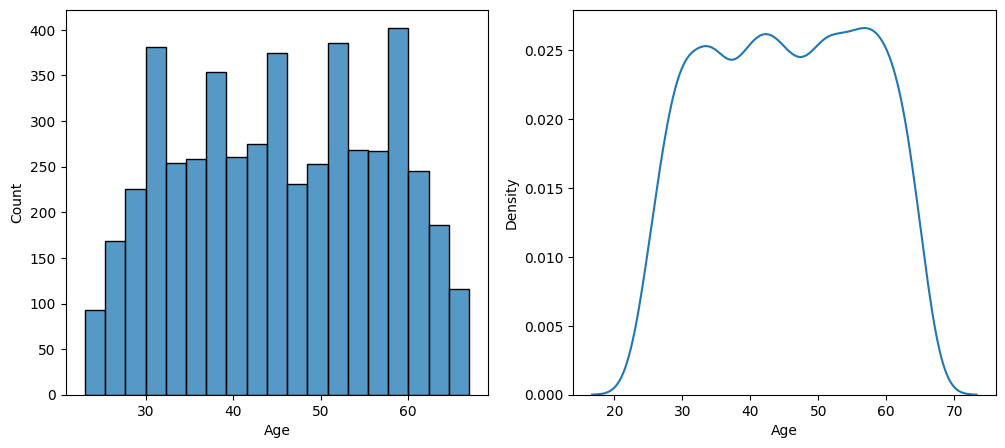

Experience


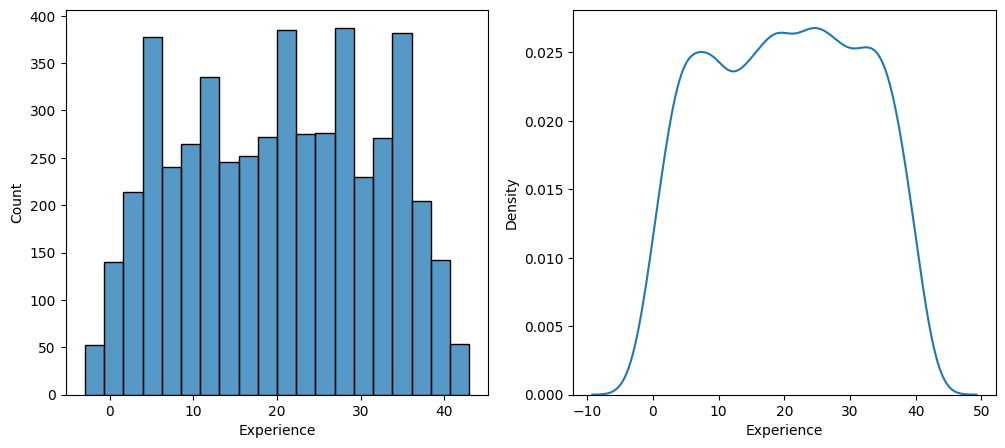

Income


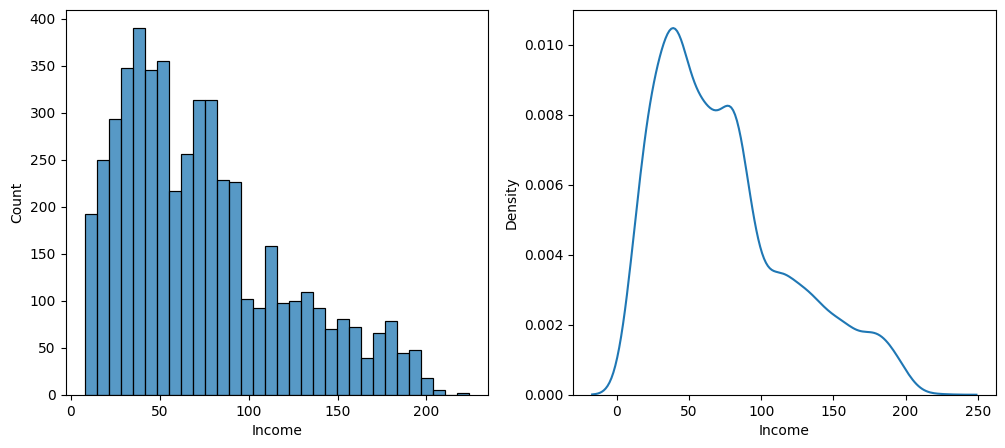

CCAvg


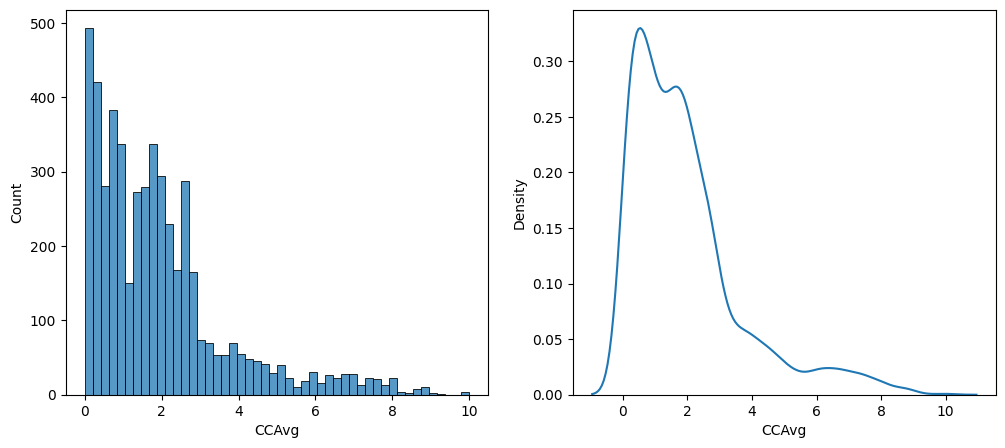

Mortgage


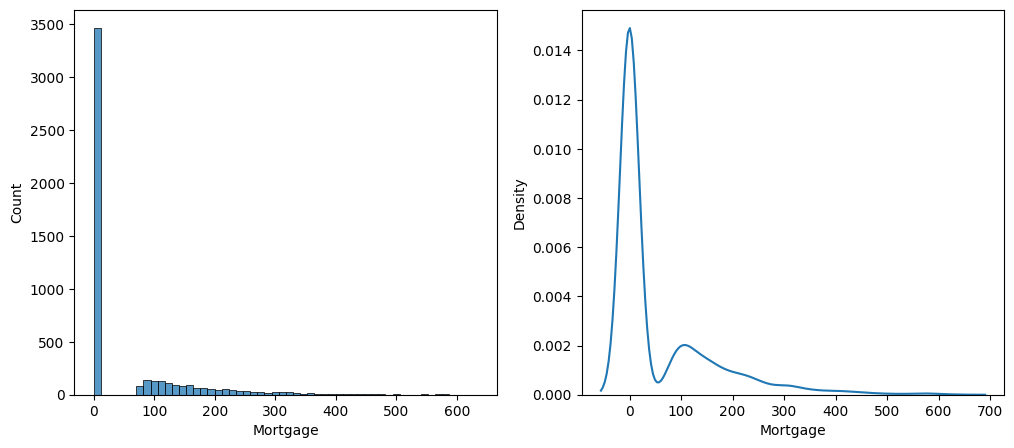

In [17]:
for col in cont_cols:
    print(col)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)#1 row,2 col
    sns.histplot(data=df,x=col)
    plt.subplot(1,2,2)
    sns.kdeplot(data=df,x=col)
    plt.show()

Family


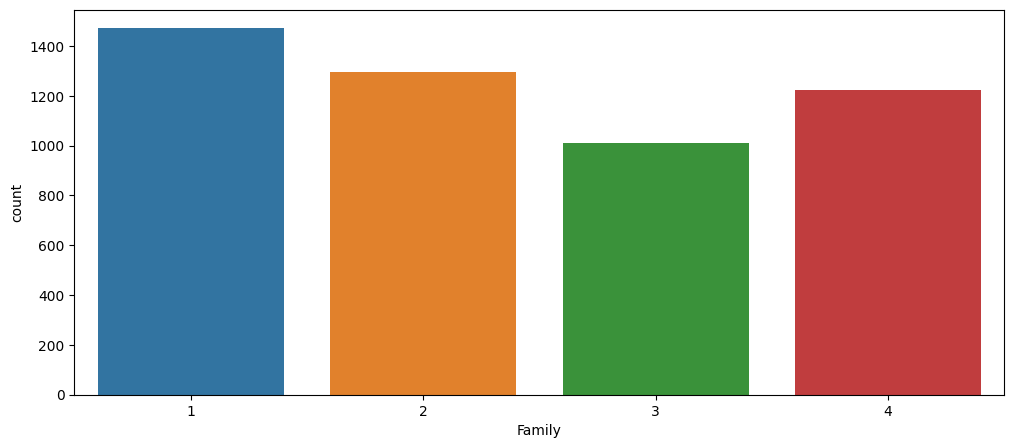

Education


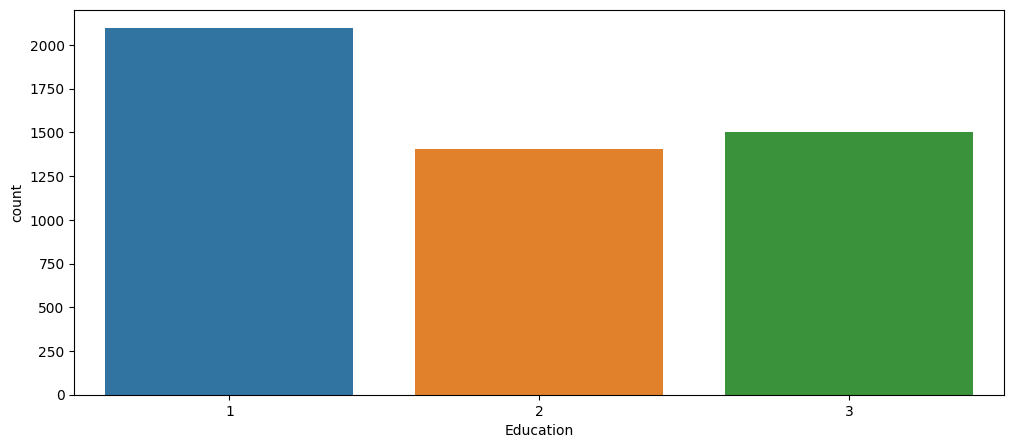

Securities_Account


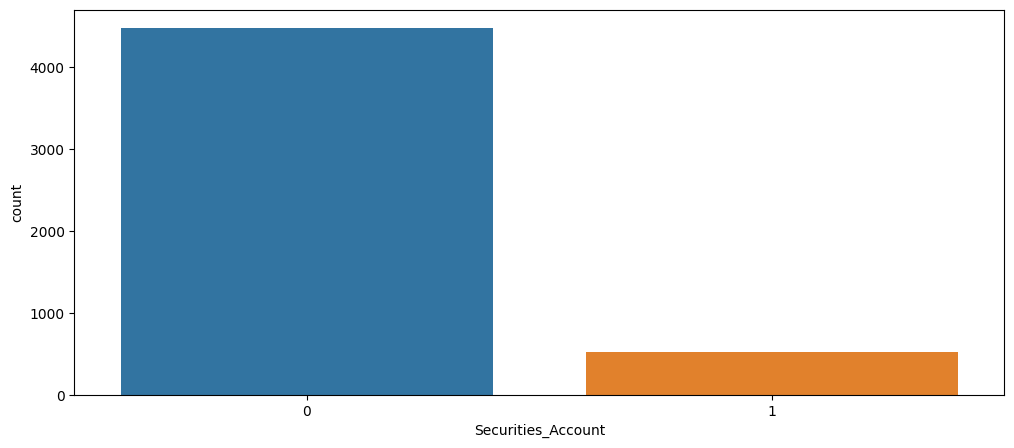

CD_Account


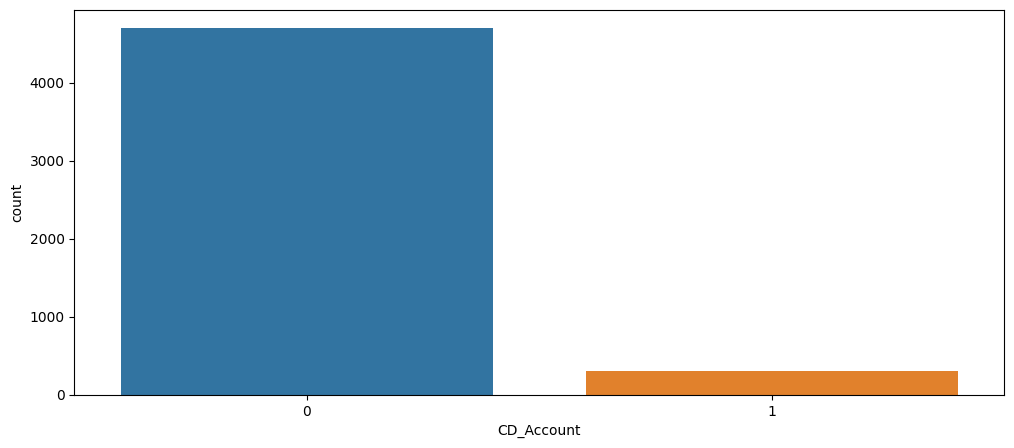

Online


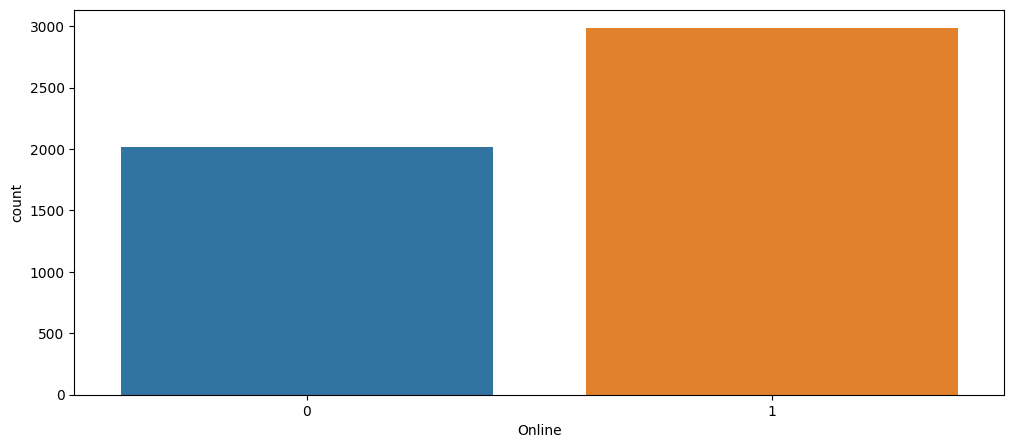

CreditCard


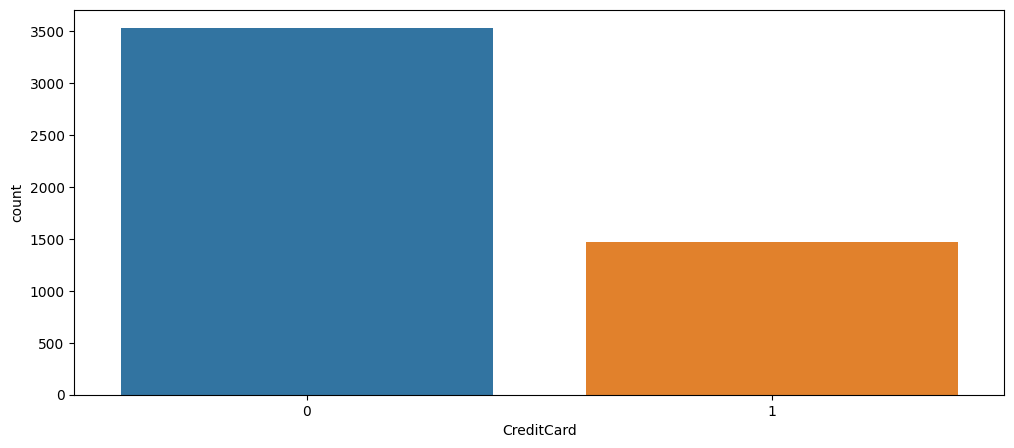

In [18]:
#Discrete/Categorical Numerical data
for col in cat_cols:
    print(col)
    plt.figure(figsize=(12,5))
    sns.countplot(data=df,x=col)
    plt.show()

Family


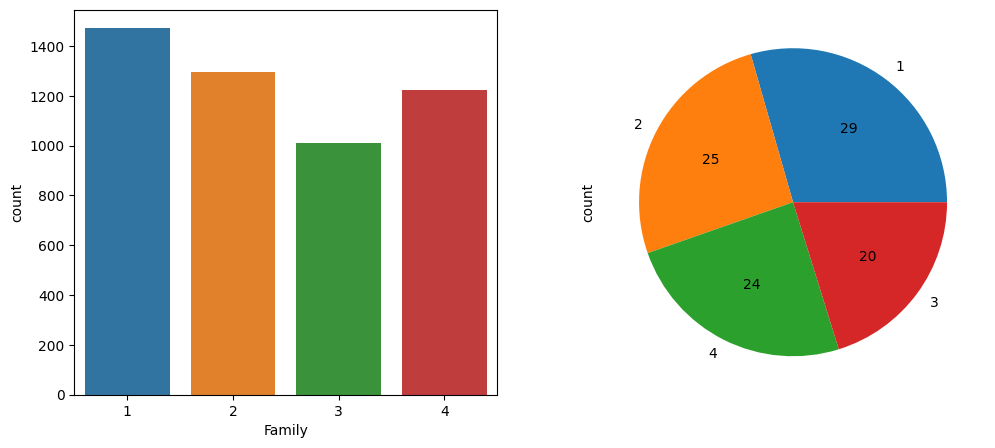

Education


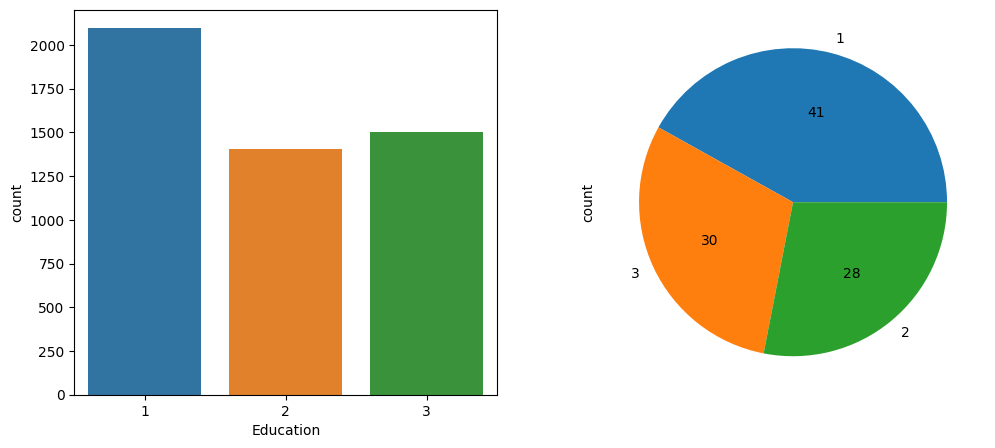

Securities_Account


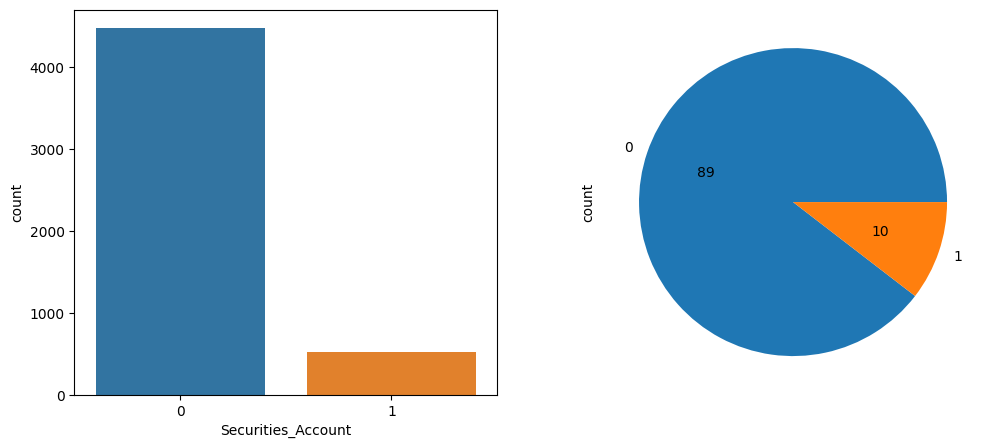

CD_Account


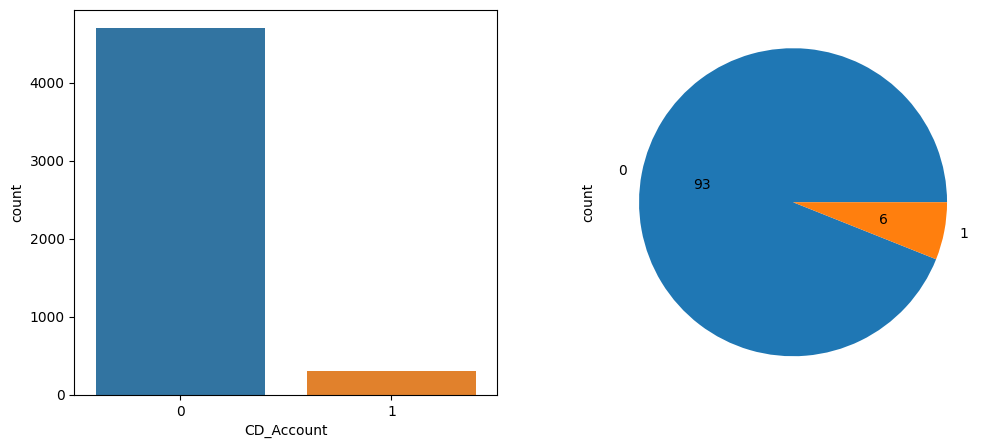

Online


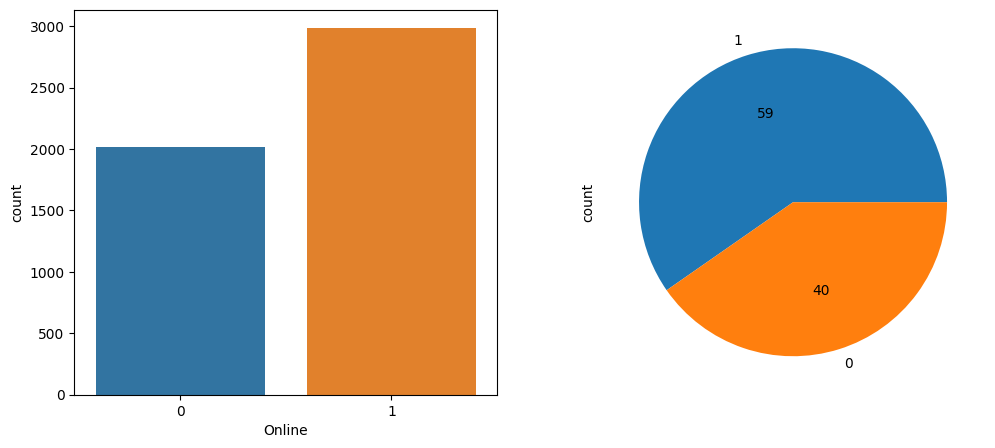

CreditCard


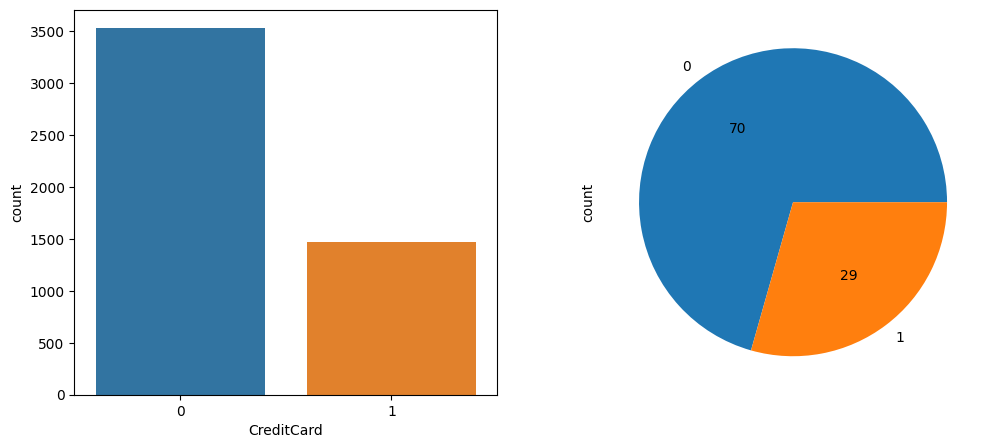

Personal_Loan


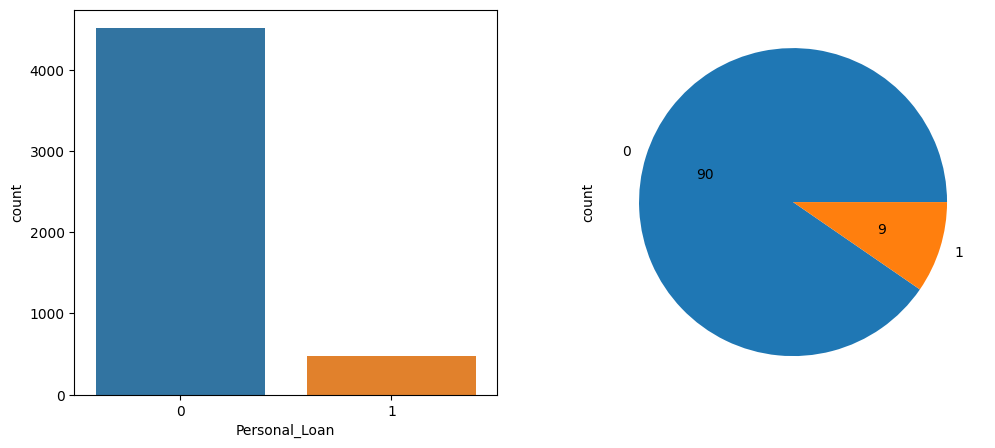

In [19]:
for col in cat_cols+[target_col]:
    print(col)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.countplot(data=df,x=col)
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie(autopct='%d')
    plt.show()

# Bivariate Analysis

Age


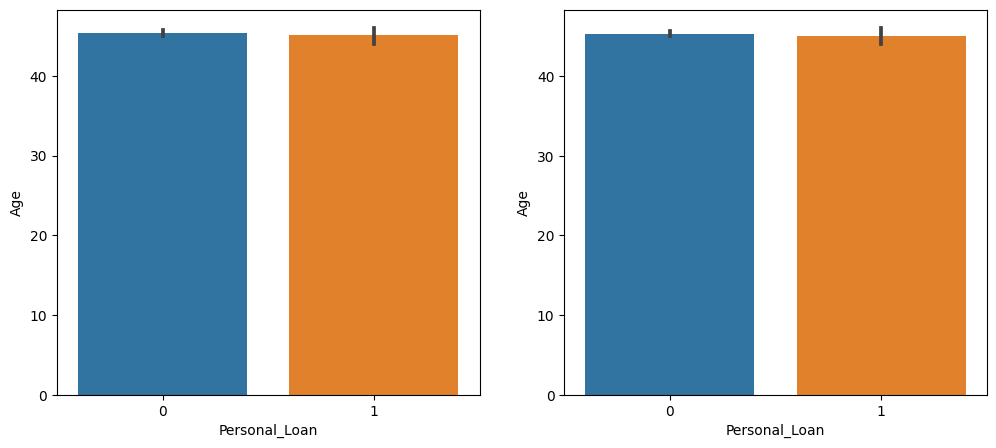

Experience


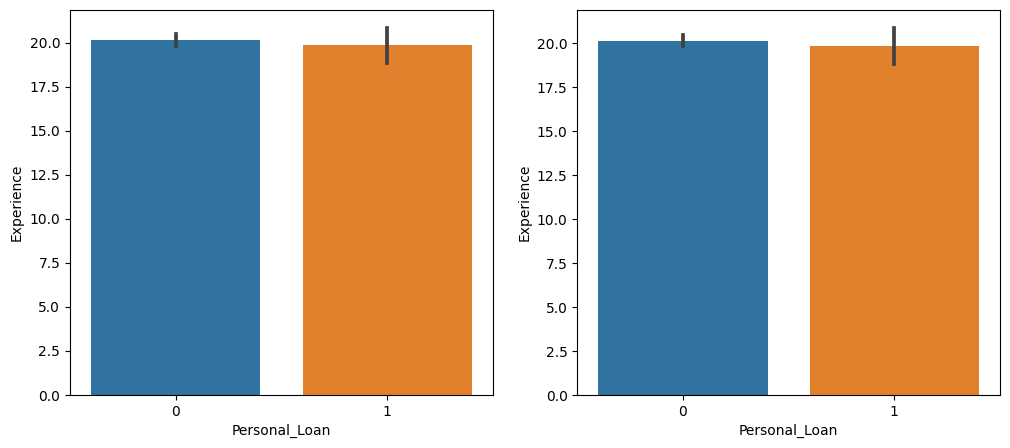

Income


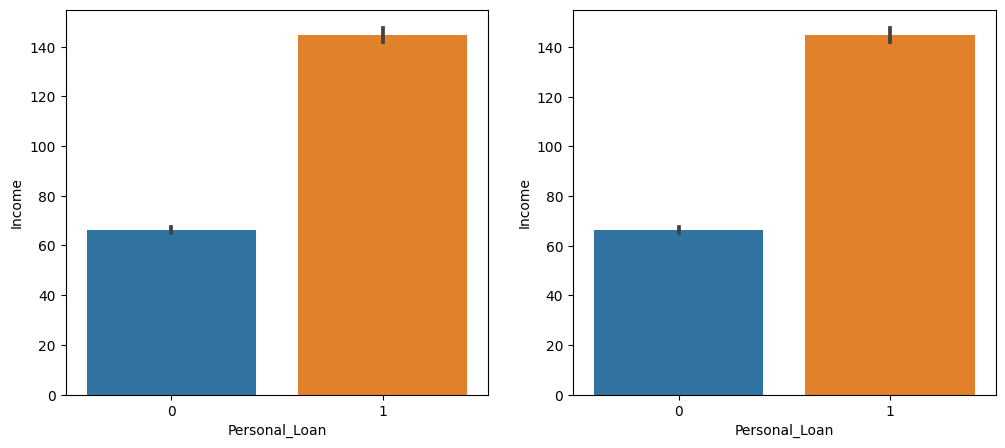

CCAvg


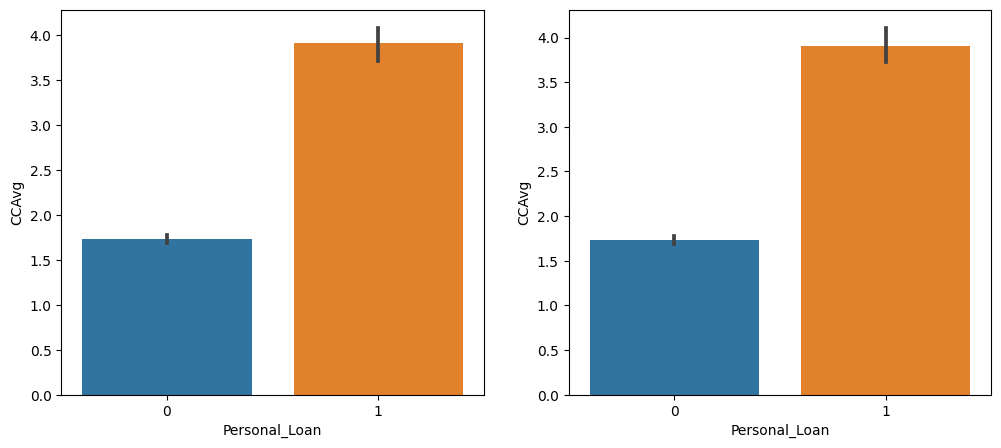

Mortgage


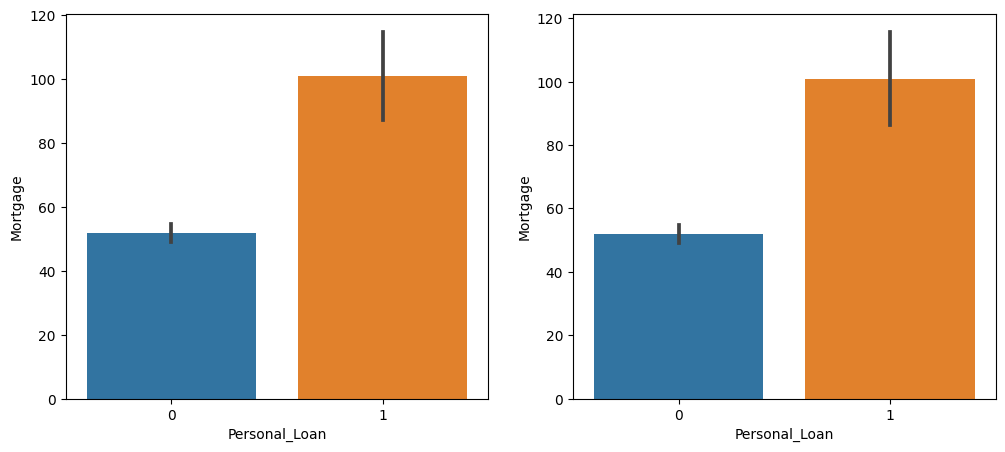

In [20]:
for col in cont_cols: #target and categorical datas
    print(col)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)#1 row,2 col
    sns.barplot(data=df,x=target_col,y=col)
    plt.subplot(1,2,2)
    sns.barplot(data=df,x=target_col,y=col)
    plt.show()

In [21]:
#Summary
# Age,Experience are not acting as a feature to Personal Loan
# Mortgage,Income ,CCAvg tooks like feature

In [22]:
#1 family member=Loan taken
print(100*2.14/(2.14+27.3))

#2 family member=Loan taken
print(100*2.12/(2.12+27.3))

7.269021739130435
7.205982324949014


Family


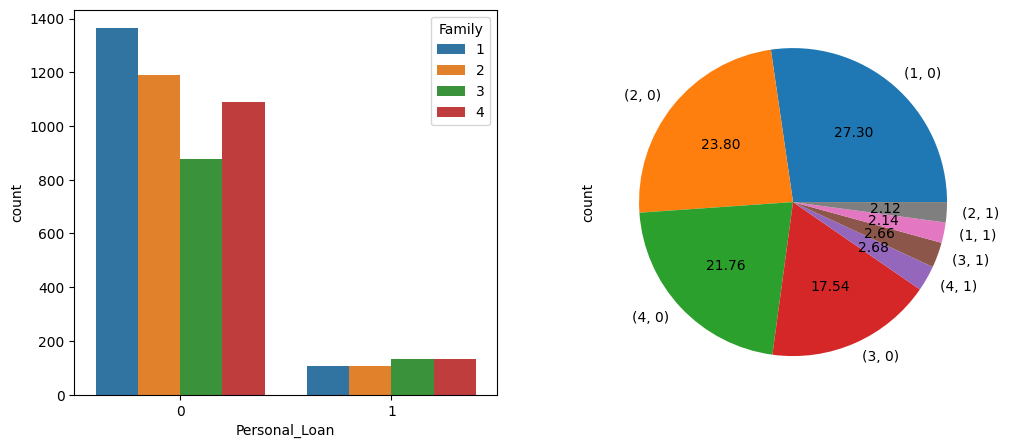

Education


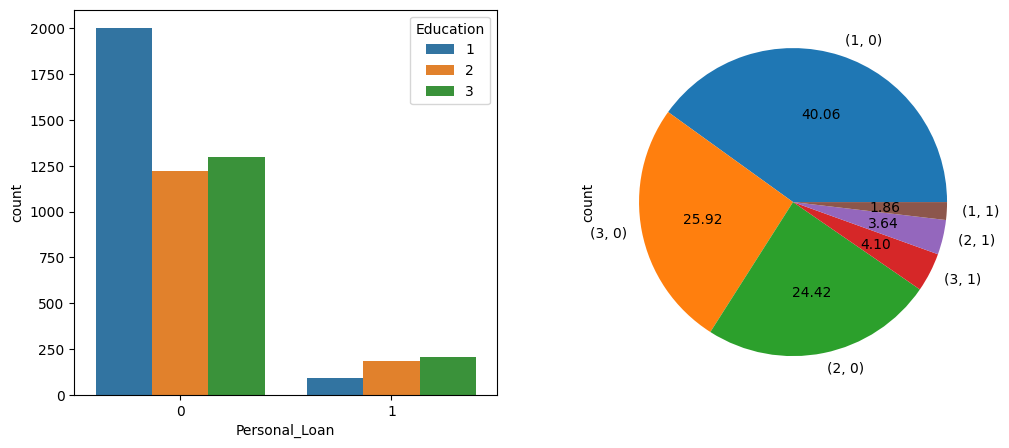

Securities_Account


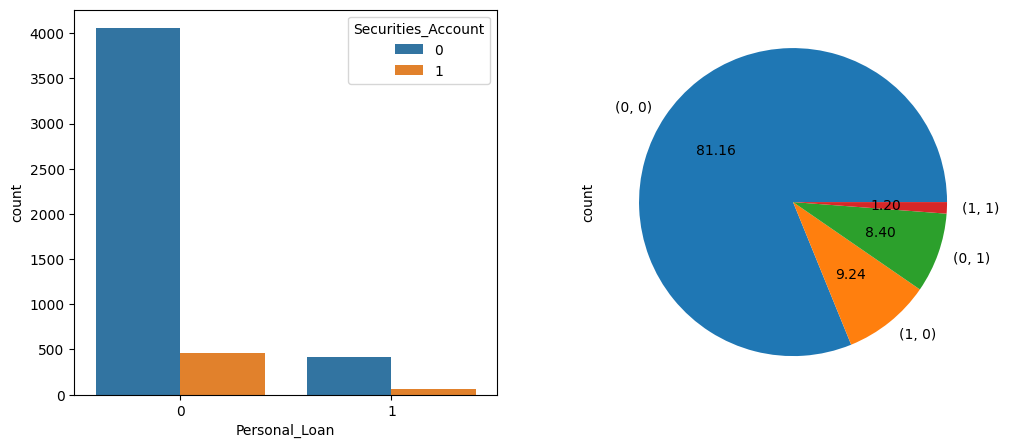

CD_Account


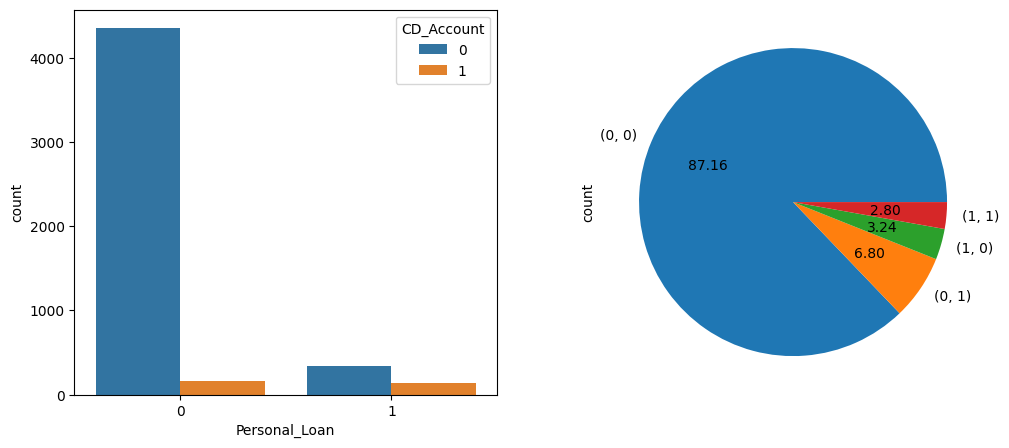

Online


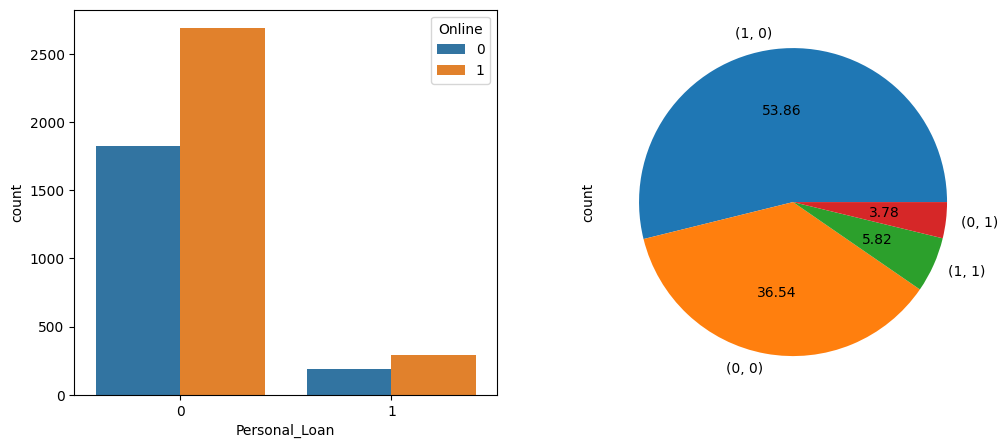

CreditCard


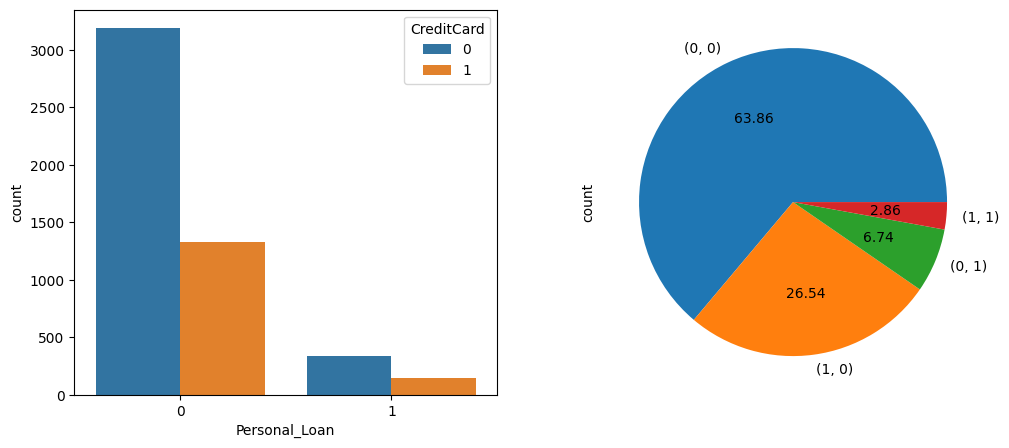

In [23]:
for col in cat_cols:
    print(col)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.countplot(data=df,x=target_col,hue=col)
    plt.subplot(1,2,2)
    df[[col,target_col]].value_counts().plot.pie(autopct='%0.2f',subplots=True)
    plt.show()

In [24]:
#summary
# Family , Education,CD_Acccount,CreditCard loan features
# Securities_Account,Online no imact or target

# Multivariate Analysis

<Axes: >

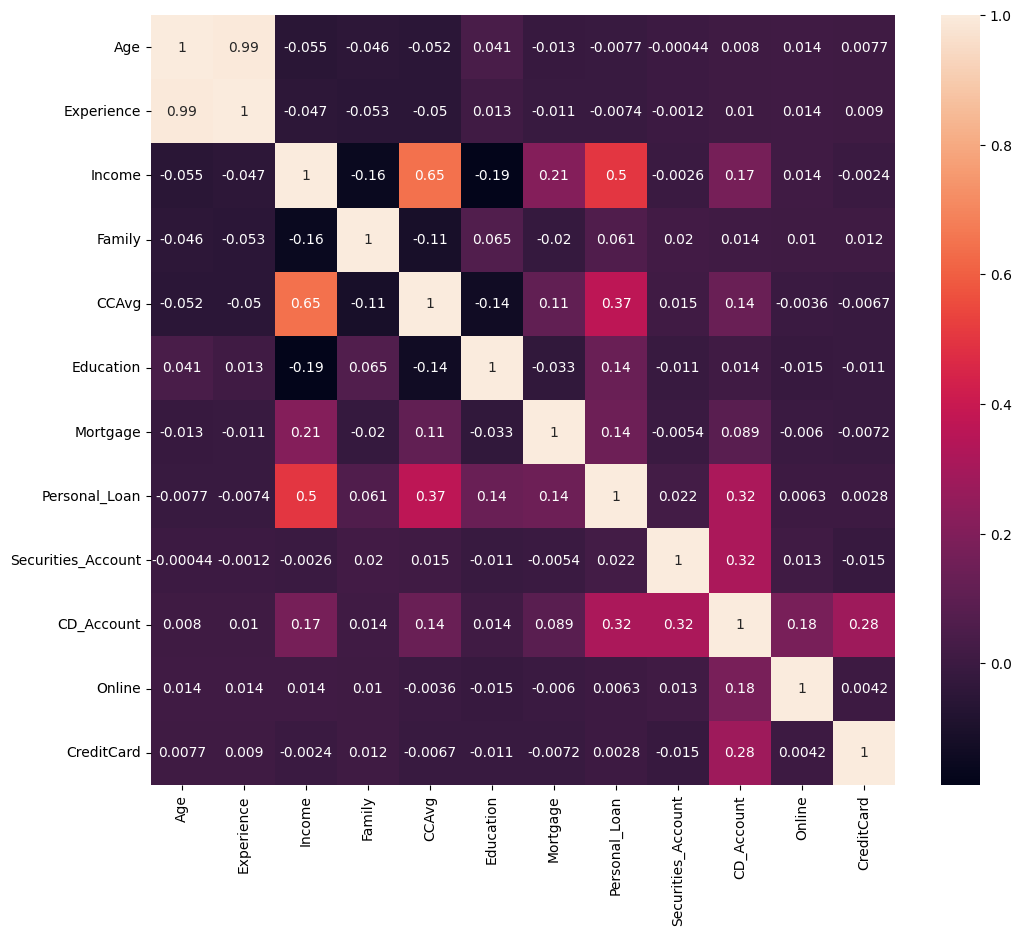

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(pd.get_dummies(df.drop(drop_cols,axis=1)).corr(),annot=True)

In [26]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression


In [ ]:
feature_cols=[]
